#### Projeção gráfica com a solução da equação de Schrodinger mediante a um potencial harmônico

O conceito harmônico é frequentemente usado nas práticas de sistemas quânticos, portanto é um bom utilitário para estudos. Para a construção da solução devemos saber que o potêncial harmônico se da:

$$V(x) = \frac{m\cdot\omega^{2}\cdot x^{2}}{2}$$

transformando a equação, unidimensional, de Schrodinger:

$$H = \frac{-\hbar^{2}}{2m}\frac{d^{2}}{{dx}^{2}}+\frac{m\cdot\omega^{2}\cdot x^{2}}{2}$$

A partir do método analítico relatado por David Griffiths no livro base de Mecânica Quântica, podemos representar a solução com polinômios de Hermite $H_n(x)$ de forma que a função de onda pode ser representada como:

$$\psi_n(x)=(\frac{m\omega}{\pi\hbar})^{1/4}\cdot\frac{1}{\sqrt{2^n\cdot n!}} \cdot H_n(x)e^{-x^{2}/2}$$

e $H_n(x)$ pode ser tabelado como:

$$H_0=1$$
$$H_1=2x$$
$$H_2=4x^{2}-2$$
$$H_3=8x^{3}-12$$
$$.$$
$$.$$
$$.$$

Por fim, para que possamos entender todo processo que circunda a função de onda, devemos desenhá-la a partir da sua representação quadrática; sua densidade.

In [1]:
# A biblioteca de plotagem de gráficos do python
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from sympy import *
from scipy.integrate import trapz

%matplotlib inline

import ipywidgets as widgets
from IPython.display import display

from scipy.special import hermite
from math import factorial

In [2]:
# Definição do fator que multiplica o polinômio de Hermite, consideraremos que a massa da partícula é 1, 
# bem com a constante verdadeira de planck, o omega pertencente a equação vale pi para que a multiplicação
# inicial seja por 1, isso é possível porque o tamanho desses fatores são pequenos o suficiente para não 
# serem necessários para a análise.

def N(n):
    return 1*1./np.sqrt(np.sqrt(np.pi)*2**n*factorial(n))

def psi(n, x):
    Hn=hermite(n)
    Px = N(n)*Hn(x)*np.exp(-0.5*x**2)
    return Px

1.0


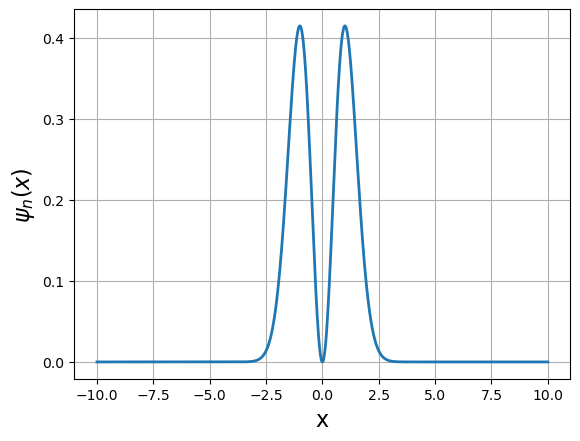

In [3]:
# Processo de integração numérica usando o método dos trapézios

x=np.linspace(-10,10,1000) # Espaçamento

psiquad=psi(1,x)**2

plt.plot(x,psiquad,lw=2) # Lineweight
    
plt.grid('on')  
plt.xlabel('x',fontsize=16)
plt.ylabel('$\psi_n(x)$',fontsize=16)

Integral = trapz(psiquad,x)

print(Integral)

1.0


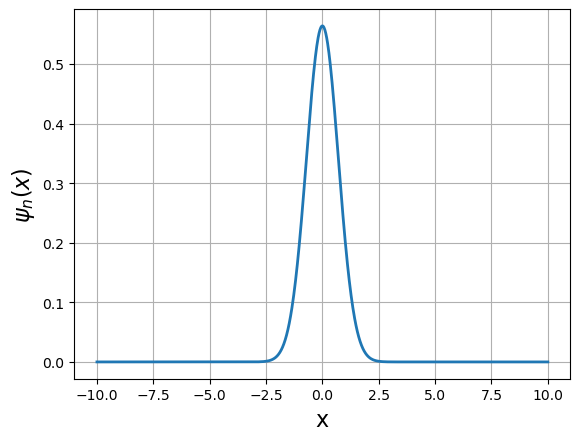

In [4]:
# Processo de integração numérica usando o método dos trapézios

x=np.linspace(-10,10,1000) # Espaçamento

psiquad=psi(0,x)**2

plt.plot(x,psiquad,lw=2) # Lineweight
    
plt.grid('on')  
plt.xlabel('x',fontsize=16)
plt.ylabel('$\psi_n(x)$',fontsize=16)

Integral = trapz(psiquad,x)

print(Integral)

In [5]:
def E(v):
    return (v + 0.5)

# potencial
def V(x):
    return 0.5*x**2


In [6]:
# Quantidade de ondas
VMAX=8 

# Tamanho máximo do intervalo do gráfico
xmin, xmax = -np.sqrt(2*E(VMAX)), np.sqrt(2*E(VMAX))

x = np.linspace(xmin, xmax, 1000)


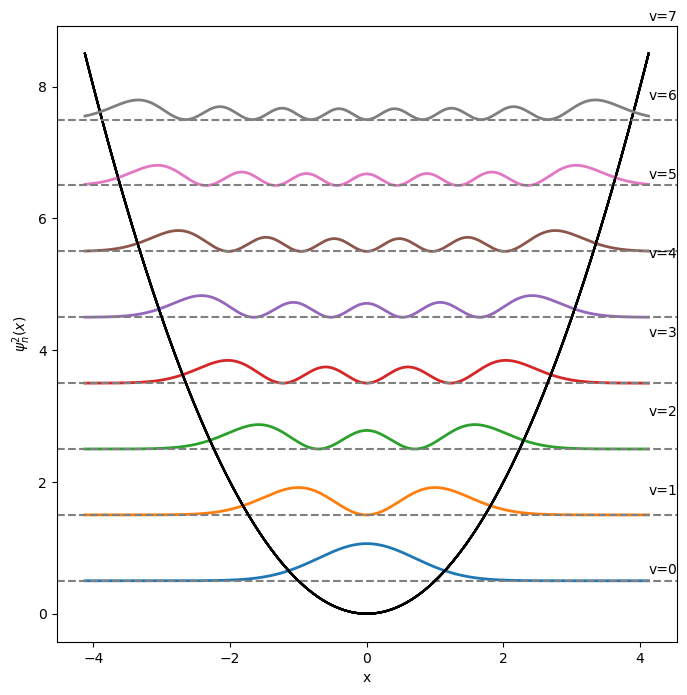

In [7]:
fig, ax = plt.subplots(figsize=(8,8))

for v in range(8):
     
    # plotando a parábola
    ax.plot(x,V(x),color='black')
    # alteração do psi quadrado para que um gráfico não sobreponha outro
    ax.plot(x,psi(v,x)**2 + E(v), lw=2)
    ax.axhline(E(v), color='gray', linestyle='--') 
    ax.text(xmax, 1.2*E(v), f"v={v}")

    
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')
fig.savefig('griffiths.png')

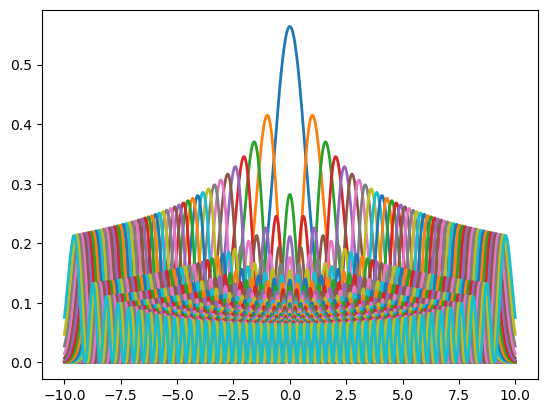

In [8]:
for v in range(50):
    x=np.linspace(-10,10,1000)
    y=psi(v,x)**2
    plt.plot(x,y,lw=2) # Lineweight


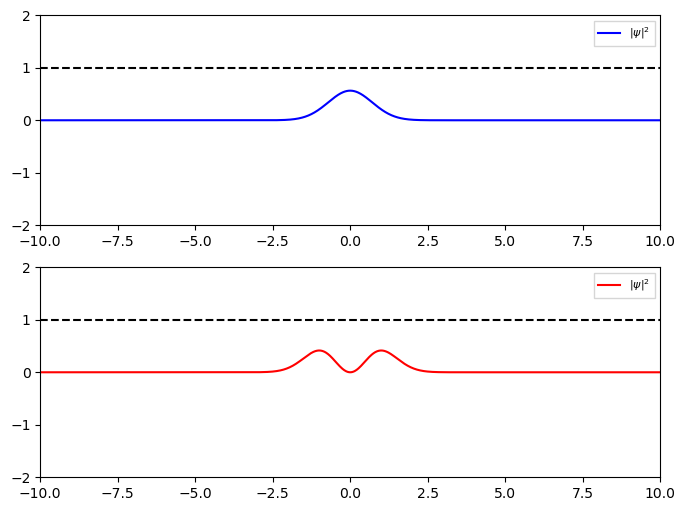

In [9]:
from matplotlib import animation

# Animação
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-2, 2)
title = ax1.set_title('')
line11, = ax1.plot([], [], "k--", label=r"")
line12, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-2, 2)
line21, = ax2.plot([], [], "k--", label=r"")
line22, = ax2.plot([], [], "r", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    x=np.linspace(-10,10,1000)
    line11.set_data(x, 1000 * 0.001)
    line21.set_data(x, 1000 * 0.001)
    return line11, line21


def animate(i):
    x=np.linspace(-10,10,1000)
    line12.set_data(x, psi(0,x)**2)
    line22.set_data(x, psi(1,x)**2)
    return line12, line22


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=30, interval=200, blit=True)


# .mp4
anim.save('curvas.mp4', fps=15, extra_args=['-vcodec', 'libx264'], dpi=600)
fig.savefig('curvas.png')

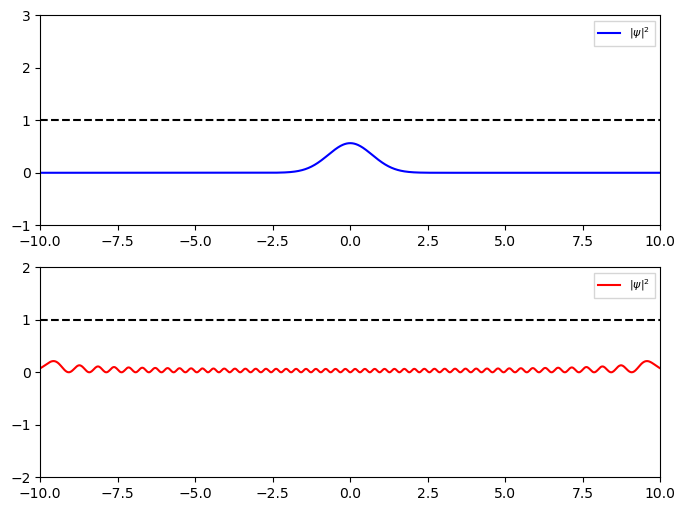

In [10]:
# Animação
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-1, 3)
title = ax1.set_title('')
line11, = ax1.plot([], [], "k--", label=r"")
line12, = ax1.plot([], [], "b", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-2, 2)
line21, = ax2.plot([], [], "k--", label=r"")
line22, = ax2.plot([], [], "r", label=r"$\vert \psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    x=np.linspace(-10,10,1000)
    line11.set_data(x, 1000 * 0.001)
    line21.set_data(x, 1000 * 0.001)
    return line11, line21


def animate(i):
    x=np.linspace(-10,10,1000)
    line12.set_data(x, psi(0,x)**2)
    line22.set_data(x, psi(i,x)**2)
    return line12, line22


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=50, interval=200, blit=True)


# .mp4
anim.save('curvas2.mp4', fps=5, extra_args=['-vcodec', 'libx264'], dpi=600)

Com os resultados invariantes no tempo, é possível encontrar a resposta para equação de Schrodinger $\Psi(x,0)$ realizando a combinação linear das funções de onda em 0 e em 1 como apresentado acima. Para primeira combinação linear utilizou-se $c_0 = 0.80$ e $c_1 = 0.60$, já que:

$$\sum\limits_{n=1}^{\mbox{oo}}|c_n|²=1$$

Já para a segunda combinação, pensou-se na equação $x²=1-y²$, para que a combinação linear gerada resultasse na proposta abordada pelo somatório.

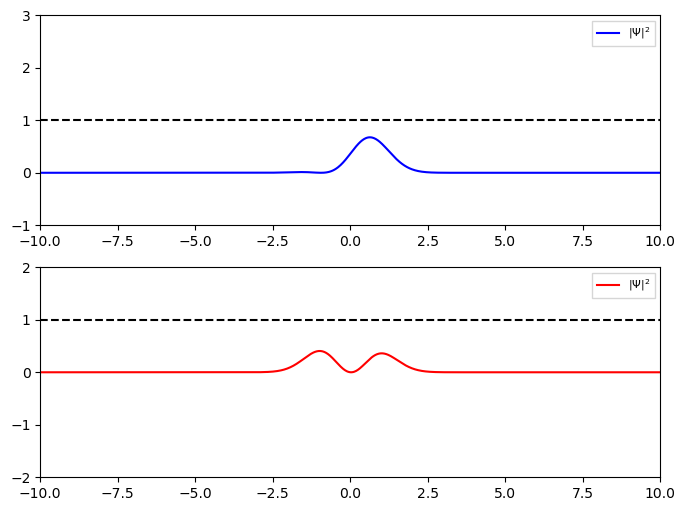

In [11]:
# Animação
fig = plt.figure(figsize=(8, 6))

ax1 = plt.subplot(2, 1, 1)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-1, 3)
title = ax1.set_title('')
line11, = ax1.plot([], [], "k--", label=r"")
line12, = ax1.plot([], [], "b", label=r"$\vert \Psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)

ax2 = plt.subplot(2, 1, 2)
ax2.set_xlim(-10, 10)
ax2.set_ylim(-2, 2)
line21, = ax2.plot([], [], "k--", label=r"")
line22, = ax2.plot([], [], "r", label=r"$\vert \Psi \vert^2$")
plt.legend(loc=1, fontsize=8, fancybox=False)


def init():
    x=np.linspace(-10,10,1000)
    line11.set_data(x, 1000 * 0.001)
    line21.set_data(x, 1000 * 0.001)
    return line11, line21


def animate(i):
    x=np.linspace(-10,10,1000)
    line12.set_data(x, (0.80*psi(0,x)+0.60*psi(1,x))**2)
    if(i <= 100):
        line22.set_data(x, (((i-1)/100)*psi(0,x)+(1-((i-1)/100)**2)*psi(1,x))**2)
    elif(i > 100):
        line22.set_data(x, ((((101-i)/100)**2)*psi(1,x)+(-(1-((101-i)/100)**2)*psi(0,x)))**2)
    return line12, line22


anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=200, blit=True)


# .mp4
anim.save('curvas3.mp4', fps=10, extra_args=['-vcodec', 'libx264'], dpi=600)

Para concretizar o resultado total da função de onda, devemos integrar a variação em tempo no nosso resultado com a exponencial:

$$e^{-iE_nt/\hbar}=e^{-i(n+1/2)\pi t}$$

tornando a função de onda variante em t, $\psi(x,t)$ e ainda, a solução também variante em t, $\Psi(x,t)$.

In [12]:
# Bibliotecas 3D

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [21]:
# Equação com o adicional da exponencial

def psixt(n, x, t):
    Hn=hermite(n)
    a = complex(1)
    Pxt = N(n)*Hn(x)*np.exp(-0.5*x**2)*np.exp(-a*(n+1/2)*t*np.pi)
    return Pxt

def psixtreal(n, x, t):
    Hn=hermite(n)
    a = complex(1)
    Pxt = N(n)*Hn(x)*np.exp(-0.5*x**2)*np.exp(a*(n+1/2)*t*np.pi)
    return Pxt

In [24]:
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y) # Matriz gerada em um linspace, por exemplo, um linspace de 0 a 1 em x resulta emarray([[0. , 0.5, 1. ], [0. , 0.5, 1. ]])
Z = psixt(0, X, Y)*psixtreal(0, X, Y)

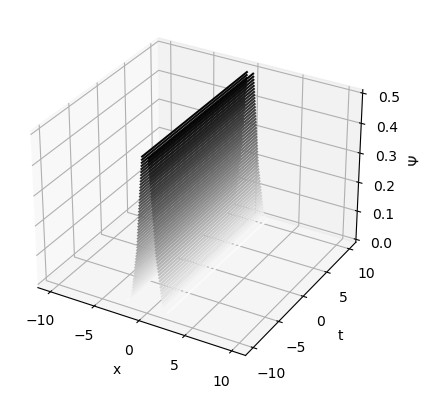

In [25]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('$\Psi$');

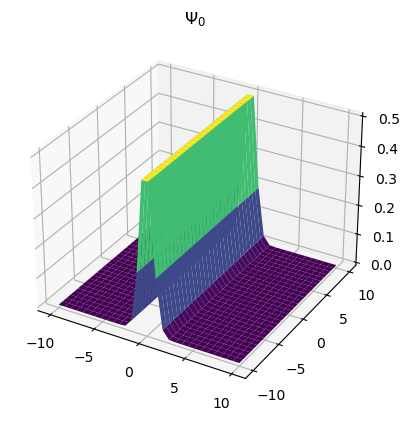

In [26]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('$\Psi_0$');

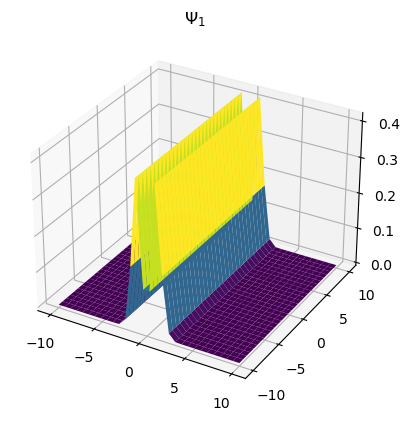

In [27]:
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

X, Y = np.meshgrid(x, y) # Matriz gerada em um linspace, por exemplo, um linspace de 0 a 1 em x resulta emarray([[0. , 0.5, 1. ], [0. , 0.5, 1. ]])
Z = psixt(1, X, Y)*psixtreal(1, X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('$\Psi_1$');

Com as soluções para os n's de valores 0 e 1, é necessário realizar a combinação linear tal como fora feito anteriormente para a equação de Schrodinger independente do tempo.